# codigo de tratamento dos graficos funcionando.

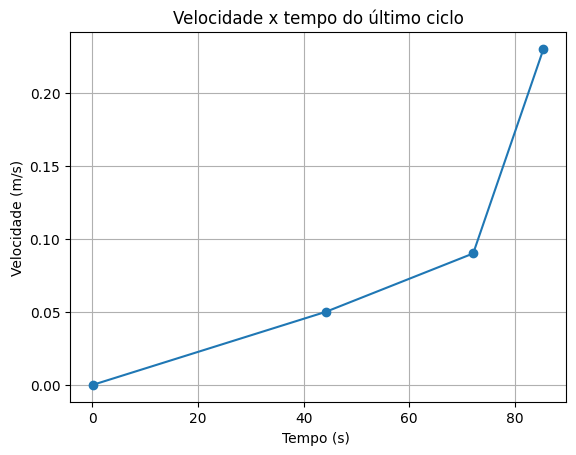

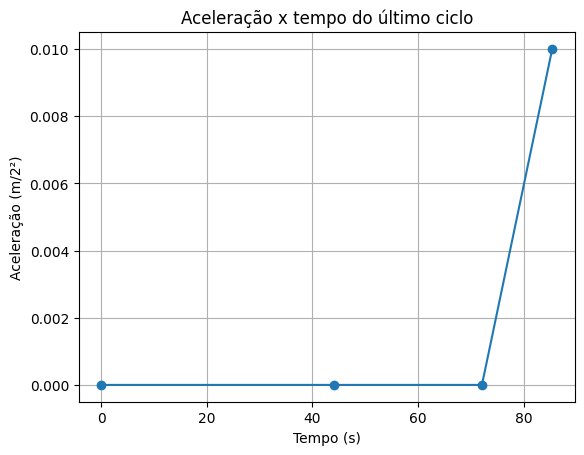

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregando os dados do arquivo CSV
tabela = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv", sep=",")

# Obtendo o último ciclo de tempo, velocidade e aceleração
linhasTabela = len(tabela) - 3
ultimoCicloTempo = tabela.loc[linhasTabela, ["tempoSensor1", "tempoSensor2", "tempoSensor3", "tempoSensor4"]]
ultimoCicloVelocidade = tabela.loc[linhasTabela, ["velocidadeSensor1", "velocidadeSensor2", "velocidadeSensor3", "velocidadeSensor4"]]
ultimoCicloAceleração = tabela.loc[linhasTabela, ["aceleracaoSensor1", "aceleracaoSensor2", "aceleracaoSensor3", "aceleracaoSensor4"]]

# display(ultimoCicloTempo)
# display(ultimoCicloVelocidade)
# display(ultimoCicloAceleração)

# Criando um gráfico de linha para Velocidade x Tempo do último ciclo
plt.plot(ultimoCicloTempo, ultimoCicloVelocidade, marker='o', linestyle='-')
plt.title("Velocidade x tempo do último ciclo")
plt.xlabel("Tempo (s) ")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()

# Criando um gráfico de linha para Aceleração x Tempo do último ciclo
plt.plot(ultimoCicloTempo, ultimoCicloAceleração, marker='o', linestyle='-')
plt.title("Aceleração x tempo do último ciclo")
plt.xlabel("Tempo (s)")
plt.ylabel("Aceleração (m/2²)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()


# codigo com curva suavizadas

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregando os dados do arquivo CSV
tabela = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv", sep=",")

# Obtendo o último ciclo de tempo, velocidade e aceleração
linhasTabela = len(tabela) - 1
ultimoCicloTempo = tabela.loc[linhasTabela, ["tempoSensor1", "tempoSensor2", "tempoSensor3", "tempoSensor4"]]
ultimoCicloVelocidade = tabela.loc[linhasTabela, ["velocidadeSensor1", "velocidadeSensor2", "velocidadeSensor3", "velocidadeSensor4"]]
ultimoCicloAceleração = tabela.loc[linhasTabela, ["aceleracaoSensor1", "aceleracaoSensor2", "aceleracaoSensor3", "aceleracaoSensor4"]]

# Criando uma função de interpolação cúbica
def cubic_interpolation(x, y, new_x):
    from scipy.interpolate import CubicSpline
    spline = CubicSpline(x, y)
    interpolated_values = spline(new_x)
    return interpolated_values

# Aumentando a densidade de pontos de interpolação
new_x = np.linspace(min(ultimoCicloTempo), max(ultimoCicloTempo), 1000)

# Interpolando os dados de velocidade e aceleração nos pontos do arquivo CSV
smoothed_velocidade = cubic_interpolation(np.array(ultimoCicloTempo), np.array(ultimoCicloVelocidade), new_x)
smoothed_aceleracao = cubic_interpolation(np.array(ultimoCicloTempo), np.array(ultimoCicloAceleração), new_x)

# Exibindo os últimos valores suavizados de tempo, velocidade e aceleração
display(ultimoCicloTempo)
display(smoothed_velocidade)
display(smoothed_aceleracao)

# Criando um gráfico de linha suavizado para Velocidade x Tempo do último ciclo
plt.plot(new_x, smoothed_velocidade, marker='', linestyle='-')
plt.title("Velocidade x tempo do último ciclo (Suavizado)")
plt.xlabel("Tempo (s) ")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()

# Criando um gráfico de linha suavizado para Aceleração x Tempo do último ciclo
plt.plot(new_x, smoothed_aceleracao, marker='', linestyle='-')
plt.title("Aceleração x tempo do último ciclo (Suavizado)")
plt.xlabel("Tempo (s)")
plt.ylabel("Aceleração (m/2²)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()



ValueError: `x` must contain only finite values.

In [ ]:
import pandas as pd

# URL do arquivo CSV
url_csv = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv"

# Carregando os dados do arquivo CSV a partir da URL
tabela = pd.read_csv(url_csv, sep=",")

display(tabela)
# Visualizando as primeiras linhas do DataFrame
# display(tabela.head())

# Certifique-se de que os nomes das colunas estejam corretos


,dia,hora,statusSensor1,statusSensor2,statusSensor3,statusSensor4,tempoSensor1,tempoSensor2,tempoSensor3,tempoSensor4,velocidadeSensor1,velocidadeSensor2,velocidadeSensor3,velocidadeSensor4,aceleracaoSensor1,aceleracaoSensor2,aceleracaoSensor3,aceleracaoSensor4
0,10/3/2023,20:25:56,1,1,1,1,0.03,0.54,0.99,1.41,0,3.91,5.49,7.21,0,7.66,3.47,4.13
1,10/3/2023,20:26:11,1,1,1,1,0.03,0.51,0.99,1.39,0,4.17,5.22,7.48,0,8.68,2.20,5.64
2,10/3/2023,20:26:24,1,1,1,1,0.03,0.43,0.80,1.16,0,4.93,6.83,8.29,0,12.13,5.20,4.02
3,10/3/2023,20:47:44,1,1,1,1,0.03,2.19,4.14,6.64,0,0.93,1.28,1.20,0,0.43,0.18,-0.03
4,10/3/2023,20:48:34,1,1,1,1,0.03,5.53,15.86,24.88,0,0.36,0.24,0.33,0,0.07,-0.01,0.01
5,10/3/2023,20:52:58,1,1,1,1,0.03,1.60,2.68,3.62,0,1.27,2.31,3.21,0,0.81,0.96,0.95
6,10/3/2023,20:54:29,1,1,1,1,0.03,0.61,1.17,1.77,0,3.45,4.42,5.03,0,5.97,1.72,1.01
7,10/3/2023,21:03:36,1,1,1,1,0.03,0.96,1.88,2.82,0,2.13,2.74,3.18,0,2.28,0.66,0.47
8,10/3/2023,21:05:29,1,1,1,1,0.03,44.17,72.10,85.41,0,0.05,0.09,0.23,0,0.00,0.00,0.01
9,11/4/2023,8:00:00,2,2,2,2,2.00,2.00,2.00,2.00,2,2.00,2.00,2.00,2,2.00,2.00,2.00


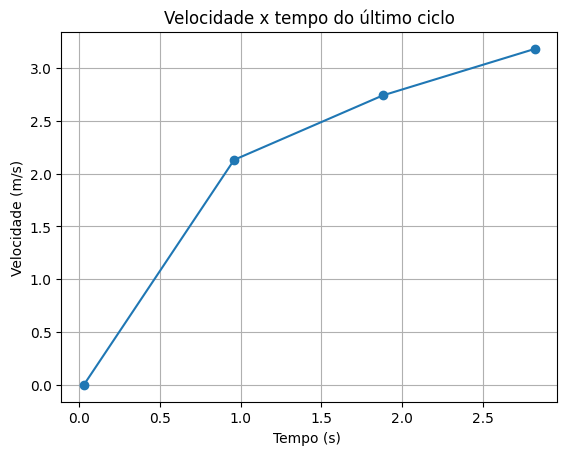

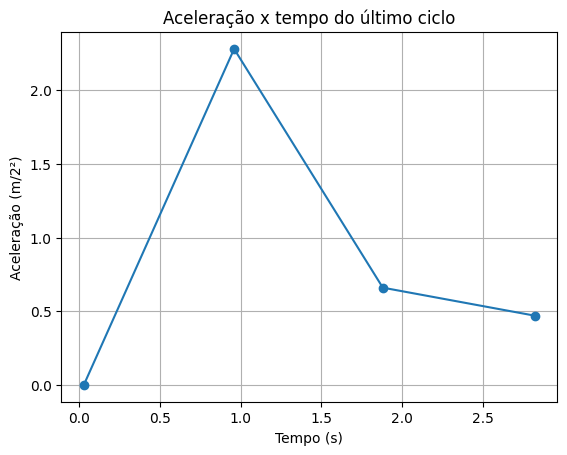

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Carregando os dados do arquivo CSV
tabela = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ6kSZFFAFOmYCWc4oo2MgRmykG67g9W39rGsDJHnPdUCjXrVXRtN9Opt1JiViyXbBpmGqn3ACT3Noj/pub?gid=0&single=true&output=csv", sep=",")

# Obtendo o último ciclo de tempo, velocidade e aceleração
linhasTabela = len(tabela) - 4
ultimoCicloTempo = tabela.loc[linhasTabela, ["tempoSensor1", "tempoSensor2", "tempoSensor3", "tempoSensor4"]]
ultimoCicloVelocidade = tabela.loc[linhasTabela, ["velocidadeSensor1", "velocidadeSensor2", "velocidadeSensor3", "velocidadeSensor4"]]
ultimoCicloAceleração = tabela.loc[linhasTabela, ["aceleracaoSensor1", "aceleracaoSensor2", "aceleracaoSensor3", "aceleracaoSensor4"]]

# display(ultimoCicloTempo)
# display(ultimoCicloVelocidade)
# display(ultimoCicloAceleração)

# Criando um gráfico de linha para Velocidade x Tempo do último ciclo
plt.plot(ultimoCicloTempo, ultimoCicloVelocidade, marker='o', linestyle='-')
plt.title("Velocidade x tempo do último ciclo")
plt.xlabel("Tempo (s) ")
plt.ylabel("Velocidade (m/s)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()

# Criando um gráfico de linha para Aceleração x Tempo do último ciclo
plt.plot(ultimoCicloTempo, ultimoCicloAceleração, marker='o', linestyle='-')
plt.title("Aceleração x tempo do último ciclo")
plt.xlabel("Tempo (s)")
plt.ylabel("Aceleração (m/2²)")
plt.grid(True)  # Adiciona uma grade de fundo
plt.show()


fig = go.Figure(data=go.Scatter(x=ultimoCicloTempo, y=ultimoCicloVelocidade))
fig.show()
fig.write_html(f'velocidade x tempo.html')

fig1 = go.Figure(data=go.Scatter(x=ultimoCicloTempo, y=ultimoCicloAceleração))
fig1.show()
fig1.write_html(f'velocidade x aceleracao.html')

